# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameter of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each datapoint $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://github.com/lewagon/data-images/blob/master/DL/moons_dataset.png?raw=true" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [7]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

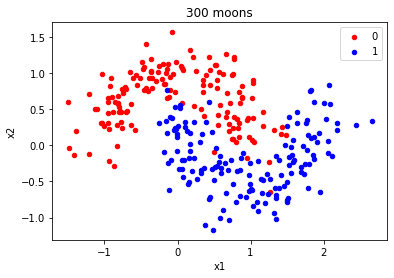

In [8]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [9]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

❓ Draw 250 samples of the data with❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [17]:
len(X_train) == len(y_train)

True

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have : 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [80]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    

    model = models.Sequential()

    model.add(layers.Dense(5, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons

    model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                     # to the class of "success"
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression, which is _in fine_ a classification algorithm
    - the ***adam*** optimizer is the gold standard in Deep Learning known as far as today - an optimizer in Deep Learning is like a solver in Machine Learning : it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
    - the stack of layers of your Neural Network
    - the output shape after each layer
    - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [21]:
model.count_params()

21

## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [81]:
model.fit(X_train,y_train, batch_size = 32, epochs=30)
history = model.history

Epoch 1/30
6/6 [==============================] - 0s 956us/step - loss: 0.8335 - accuracy: 0.2971
Epoch 2/30
6/6 [==============================] - 0s 893us/step - loss: 0.8257 - accuracy: 0.2971
Epoch 3/30
6/6 [==============================] - 0s 1ms/step - loss: 0.8180 - accuracy: 0.2971
Epoch 4/30
6/6 [==============================] - 0s 1ms/step - loss: 0.8108 - accuracy: 0.2971
Epoch 5/30
6/6 [==============================] - 0s 798us/step - loss: 0.8040 - accuracy: 0.3086
Epoch 6/30
6/6 [==============================] - 0s 1ms/step - loss: 0.7967 - accuracy: 0.3143
Epoch 7/30
6/6 [==============================] - 0s 714us/step - loss: 0.7902 - accuracy: 0.3200
Epoch 8/30
6/6 [==============================] - 0s 878us/step - loss: 0.7835 - accuracy: 0.3200
Epoch 9/30
6/6 [==============================] - 0s 1ms/step - loss: 0.7775 - accuracy: 0.3143
Epoch 10/30
6/6 [==============================] - 0s 743us/step - loss: 0.7713 - accuracy: 0.3314
Epoch 11/30
6/6 [==========

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [34]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x14cfb2d30>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6393904685974121,
   0.6354336738586426,
   0.6316136121749878,
   0.6278921961784363,
   0.6238682270050049,
   0.6206135153770447,
   0.6166080236434937,
   0.6133701205253601,
   0.610047459602356,
   0.6066189408302307,
   0.6035622358322144,
   0.6002670526504517,
   0.5972623229026794,
   0.5942263603210449,
   0.5913518667221069,
   0.5883565545082092,
   0.5857657790184021,
   0.5831466913223267,
   0.5805293321609497,
   0.5780394673347473],
  'accuracy': [0.5199999809265137,
   0.5199999809265137,
   0.6742857098579407,
   0.8342857360839844,
   0.8342857360839844,
   0.8342857360839844,
   0.8342857360839844,
   0.8342857360839844,
   0.8342857360839844,
   0.8399999737739563,
   0.845714271068573,
   0.8399999737739563,
   0.845714271068573,
   0.845714271068573,
   0.845714271068573,
   

❓ Plot the history of the train loss using the following function ❓

In [35]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

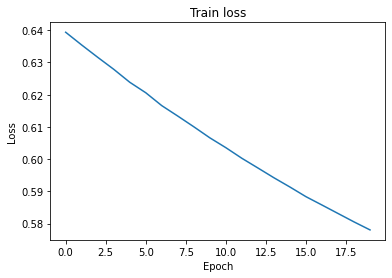

In [36]:
plot_history(history)

❓ What do you observe ❓

It decreases almost linearly

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, can it be generalized to unseen data such as the test set ? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [42]:
y_pred = model.predict(X_test)

In [57]:
predictions = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [58]:
predictions

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0]

In [56]:
y_pred

array([[0.51683074],
       [0.44151384],
       [0.342832  ],
       [0.47852167],
       [0.22239783],
       [0.51683074],
       [0.44396093],
       [0.51683074],
       [0.51683074],
       [0.46655977],
       [0.25622964],
       [0.51683074],
       [0.42371142],
       [0.51683074],
       [0.27731398],
       [0.51683074],
       [0.43625933],
       [0.50233126],
       [0.31954104],
       [0.24967757],
       [0.43815473],
       [0.51683074],
       [0.1938586 ],
       [0.4289747 ],
       [0.51683074],
       [0.51683074],
       [0.51683074],
       [0.51683074],
       [0.19661728],
       [0.24346894],
       [0.51683074],
       [0.51683074],
       [0.51683074],
       [0.51683074],
       [0.2511801 ],
       [0.2649945 ],
       [0.3285974 ],
       [0.5368204 ],
       [0.48009905],
       [0.2591227 ],
       [0.33471203],
       [0.30538198],
       [0.47559792],
       [0.51683074],
       [0.21093622],
       [0.51012874],
       [0.3810537 ],
       [0.516

❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [47]:
accuracy = model.evaluate(X_test, y_test)[1]

3/3 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.8800


**🧪 Test your code**

In [48]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_first_model.py::TestFirstModel::test_accuracy PASSED          [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master


❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [50]:
from utils import plots

In [54]:
len(X_test), len(y_pred)

(75, 75)

In [55]:
X_test[:5]

array([[ 1.94849668,  0.14572302],
       [ 0.58038694,  0.46111673],
       [-1.01542021,  0.20026334],
       [ 0.93239595,  0.31433843],
       [-0.98434901,  0.67228054]])

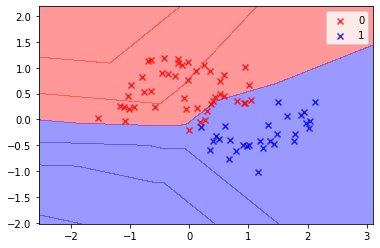

In [59]:
plots.plot_decision_regions(X_test, predictions, model)

😥 It looks a bit underfitted, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model on 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [66]:
new_model = initialize_model()
new_model.fit(X_train,y_train, batch_size = 32, epochs=500)
history = new_model.history
history.__dict__

Epoch 1/500
6/6 [==============================] - 0s 933us/step - loss: 0.8056 - accuracy: 0.2457
Epoch 2/500
6/6 [==============================] - 0s 877us/step - loss: 0.8003 - accuracy: 0.2229
Epoch 3/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7952 - accuracy: 0.2114
Epoch 4/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7899 - accuracy: 0.2114
Epoch 5/500
6/6 [==============================] - 0s 996us/step - loss: 0.7852 - accuracy: 0.2114
Epoch 6/500
6/6 [==============================] - 0s 757us/step - loss: 0.7808 - accuracy: 0.2114
Epoch 7/500
6/6 [==============================] - 0s 808us/step - loss: 0.7764 - accuracy: 0.2057
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7723 - accuracy: 0.2171
Epoch 9/500
6/6 [==============================] - 0s 725us/step - loss: 0.7683 - accuracy: 0.2171
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7645 - accuracy: 0.2114
Epoch 11/500
6/6 

6/6 [==============================] - 0s 723us/step - loss: 0.5506 - accuracy: 0.8629
Epoch 84/500
6/6 [==============================] - 0s 854us/step - loss: 0.5482 - accuracy: 0.8571
Epoch 85/500
6/6 [==============================] - 0s 991us/step - loss: 0.5459 - accuracy: 0.8571
Epoch 86/500
6/6 [==============================] - 0s 775us/step - loss: 0.5435 - accuracy: 0.8571
Epoch 87/500
6/6 [==============================] - 0s 972us/step - loss: 0.5413 - accuracy: 0.8571
Epoch 88/500
6/6 [==============================] - 0s 732us/step - loss: 0.5390 - accuracy: 0.8571
Epoch 89/500
6/6 [==============================] - 0s 720us/step - loss: 0.5368 - accuracy: 0.8571
Epoch 90/500
6/6 [==============================] - 0s 837us/step - loss: 0.5346 - accuracy: 0.8571
Epoch 91/500
6/6 [==============================] - 0s 708us/step - loss: 0.5326 - accuracy: 0.8571
Epoch 92/500
6/6 [==============================] - 0s 740us/step - loss: 0.5307 - accuracy: 0.8571
Epoch 93/500


6/6 [==============================] - 0s 703us/step - loss: 0.4311 - accuracy: 0.8457
Epoch 165/500
6/6 [==============================] - 0s 977us/step - loss: 0.4300 - accuracy: 0.8457
Epoch 166/500
6/6 [==============================] - 0s 817us/step - loss: 0.4288 - accuracy: 0.8457
Epoch 167/500
6/6 [==============================] - 0s 735us/step - loss: 0.4276 - accuracy: 0.8457
Epoch 168/500
6/6 [==============================] - 0s 829us/step - loss: 0.4265 - accuracy: 0.8457
Epoch 169/500
6/6 [==============================] - 0s 712us/step - loss: 0.4253 - accuracy: 0.8457
Epoch 170/500
6/6 [==============================] - 0s 829us/step - loss: 0.4240 - accuracy: 0.8457
Epoch 171/500
6/6 [==============================] - 0s 790us/step - loss: 0.4228 - accuracy: 0.8457
Epoch 172/500
6/6 [==============================] - 0s 726us/step - loss: 0.4215 - accuracy: 0.8457
Epoch 173/500
6/6 [==============================] - 0s 924us/step - loss: 0.4202 - accuracy: 0.8457
Epoc

6/6 [==============================] - 0s 760us/step - loss: 0.3609 - accuracy: 0.8400
Epoch 246/500
6/6 [==============================] - 0s 948us/step - loss: 0.3605 - accuracy: 0.8400
Epoch 247/500
6/6 [==============================] - 0s 908us/step - loss: 0.3602 - accuracy: 0.8400
Epoch 248/500
6/6 [==============================] - 0s 887us/step - loss: 0.3597 - accuracy: 0.8400
Epoch 249/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8400
Epoch 250/500
6/6 [==============================] - 0s 784us/step - loss: 0.3589 - accuracy: 0.8400
Epoch 251/500
6/6 [==============================] - 0s 687us/step - loss: 0.3585 - accuracy: 0.8400
Epoch 252/500
6/6 [==============================] - 0s 829us/step - loss: 0.3580 - accuracy: 0.8400
Epoch 253/500
6/6 [==============================] - 0s 920us/step - loss: 0.3577 - accuracy: 0.8400
Epoch 254/500
6/6 [==============================] - 0s 829us/step - loss: 0.3574 - accuracy: 0.8400
Epoch 

6/6 [==============================] - 0s 783us/step - loss: 0.3397 - accuracy: 0.8571
Epoch 327/500
6/6 [==============================] - 0s 734us/step - loss: 0.3395 - accuracy: 0.8571
Epoch 328/500
6/6 [==============================] - 0s 702us/step - loss: 0.3393 - accuracy: 0.8571
Epoch 329/500
6/6 [==============================] - 0s 866us/step - loss: 0.3391 - accuracy: 0.8571
Epoch 330/500
6/6 [==============================] - 0s 743us/step - loss: 0.3390 - accuracy: 0.8571
Epoch 331/500
6/6 [==============================] - 0s 818us/step - loss: 0.3389 - accuracy: 0.8571
Epoch 332/500
6/6 [==============================] - 0s 774us/step - loss: 0.3386 - accuracy: 0.8571
Epoch 333/500
6/6 [==============================] - 0s 756us/step - loss: 0.3385 - accuracy: 0.8571
Epoch 334/500
6/6 [==============================] - 0s 962us/step - loss: 0.3383 - accuracy: 0.8571
Epoch 335/500
6/6 [==============================] - 0s 835us/step - loss: 0.3382 - accuracy: 0.8571
Epoc

6/6 [==============================] - 0s 693us/step - loss: 0.3277 - accuracy: 0.8629
Epoch 408/500
6/6 [==============================] - 0s 886us/step - loss: 0.3276 - accuracy: 0.8571
Epoch 409/500
6/6 [==============================] - 0s 879us/step - loss: 0.3275 - accuracy: 0.8629
Epoch 410/500
6/6 [==============================] - 0s 785us/step - loss: 0.3273 - accuracy: 0.8571
Epoch 411/500
6/6 [==============================] - 0s 784us/step - loss: 0.3271 - accuracy: 0.8571
Epoch 412/500
6/6 [==============================] - 0s 830us/step - loss: 0.3270 - accuracy: 0.8571
Epoch 413/500
6/6 [==============================] - 0s 821us/step - loss: 0.3269 - accuracy: 0.8571
Epoch 414/500
6/6 [==============================] - 0s 716us/step - loss: 0.3268 - accuracy: 0.8571
Epoch 415/500
6/6 [==============================] - 0s 875us/step - loss: 0.3266 - accuracy: 0.8571
Epoch 416/500
6/6 [==============================] - 0s 732us/step - loss: 0.3264 - accuracy: 0.8571
Epoc

6/6 [==============================] - 0s 802us/step - loss: 0.3178 - accuracy: 0.8571
Epoch 489/500
6/6 [==============================] - 0s 935us/step - loss: 0.3177 - accuracy: 0.8571
Epoch 490/500
6/6 [==============================] - 0s 786us/step - loss: 0.3176 - accuracy: 0.8571
Epoch 491/500
6/6 [==============================] - 0s 894us/step - loss: 0.3175 - accuracy: 0.8571
Epoch 492/500
6/6 [==============================] - 0s 978us/step - loss: 0.3173 - accuracy: 0.8571
Epoch 493/500
6/6 [==============================] - 0s 691us/step - loss: 0.3172 - accuracy: 0.8571
Epoch 494/500
6/6 [==============================] - 0s 857us/step - loss: 0.3171 - accuracy: 0.8629
Epoch 495/500
6/6 [==============================] - 0s 818us/step - loss: 0.3170 - accuracy: 0.8629
Epoch 496/500
6/6 [==============================] - 0s 779us/step - loss: 0.3168 - accuracy: 0.8629
Epoch 497/500
6/6 [==============================] - 0s 754us/step - loss: 0.3168 - accuracy: 0.8629
Epoc

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x14ecac8b0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.8055862188339233,
   0.8002697825431824,
   0.795170783996582,
   0.7899078130722046,
   0.7852455377578735,
   0.7808430790901184,
   0.7764125466346741,
   0.7723164558410645,
   0.7682957053184509,
   0.7644972205162048,
   0.7609854340553284,
   0.7573315501213074,
   0.7540673017501831,
   0.750962495803833,
   0.7477003931999207,
   0.7447205185890198,
   0.7419127821922302,
   0.7394789457321167,
   0.7365505695343018,
   0.7340965867042542,
   0.7316205501556396,
   0.7292705178260803,
   0.726835310459137,
   0.7244729995727539,
   0.7221431136131287,
   0.7198435068130493,
   0.7172510623931885,
   0.7149638533592224,
   0.7124668955802917,
   0.710106611251831,
   0.7076756954193115,
   0.7050391435623169,
   0.7025041580200195,
   0.6997262835502625,
   0.6973133087158203,
   0.6946446299

❓ Did the test accuracy improve? ❓

not really

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem ❓


In [67]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()

    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [68]:
model.count_params()

331

❓ Run your model on the previous dataset with 500 epochs and plot the loss afterwards ❓

In [76]:
model.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9771
Epoch 2/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9771
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9771
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9771
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9771
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9771
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9771
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9771
Epoch 9/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9771
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9771
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 912us/step - loss: 0.0783 - accuracy: 0.9771
Epoch 84/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9771
Epoch 85/500
6/6 [==============================] - 0s 942us/step - loss: 0.0785 - accuracy: 0.9771
Epoch 86/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9771
Epoch 87/500
6/6 [==============================] - 0s 976us/step - loss: 0.0786 - accuracy: 0.9771
Epoch 88/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9771
Epoch 89/500
6/6 [==============================] - 0s 769us/step - loss: 0.0788 - accuracy: 0.9771
Epoch 90/500
6/6 [==============================] - 0s 969us/step - loss: 0.0787 - accuracy: 0.9771
Epoch 91/500
6/6 [==============================] - 0s 894us/step - loss: 0.0788 - accuracy: 0.9771
Epoch 92/500
6/6 [==============================] - 0s 821us/step - loss: 0.0789 - accuracy: 0.9771
Epoch 93/500
6/6 [=

6/6 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9771
Epoch 165/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9771
Epoch 166/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9771
Epoch 167/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9771
Epoch 168/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9771
Epoch 169/500
6/6 [==============================] - 0s 990us/step - loss: 0.0765 - accuracy: 0.9771
Epoch 170/500
6/6 [==============================] - 0s 763us/step - loss: 0.0766 - accuracy: 0.9771
Epoch 171/500
6/6 [==============================] - 0s 945us/step - loss: 0.0759 - accuracy: 0.9771
Epoch 172/500
6/6 [==============================] - 0s 812us/step - loss: 0.0760 - accuracy: 0.9771
Epoch 173/500
6/6 [==============================] - 0s 815us/step - loss: 0.0761 - accuracy: 0.9771
Epoch 174/500


6/6 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9771
Epoch 246/500
6/6 [==============================] - 0s 816us/step - loss: 0.0741 - accuracy: 0.9771
Epoch 247/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9771
Epoch 248/500
6/6 [==============================] - 0s 744us/step - loss: 0.0741 - accuracy: 0.9771
Epoch 249/500
6/6 [==============================] - 0s 940us/step - loss: 0.0739 - accuracy: 0.9771
Epoch 250/500
6/6 [==============================] - 0s 811us/step - loss: 0.0737 - accuracy: 0.9771
Epoch 251/500
6/6 [==============================] - 0s 738us/step - loss: 0.0742 - accuracy: 0.9771
Epoch 252/500
6/6 [==============================] - 0s 879us/step - loss: 0.0744 - accuracy: 0.9771
Epoch 253/500
6/6 [==============================] - 0s 800us/step - loss: 0.0743 - accuracy: 0.9771
Epoch 254/500
6/6 [==============================] - 0s 951us/step - loss: 0.0739 - accuracy: 0.9771
Epoch 25

6/6 [==============================] - 0s 895us/step - loss: 0.0726 - accuracy: 0.9771
Epoch 327/500
6/6 [==============================] - 0s 775us/step - loss: 0.0722 - accuracy: 0.9771
Epoch 328/500
6/6 [==============================] - 0s 932us/step - loss: 0.0722 - accuracy: 0.9771
Epoch 329/500
6/6 [==============================] - 0s 885us/step - loss: 0.0723 - accuracy: 0.9771
Epoch 330/500
6/6 [==============================] - 0s 863us/step - loss: 0.0722 - accuracy: 0.9771
Epoch 331/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9771
Epoch 332/500
6/6 [==============================] - 0s 843us/step - loss: 0.0719 - accuracy: 0.9771
Epoch 333/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9771
Epoch 334/500
6/6 [==============================] - 0s 773us/step - loss: 0.0732 - accuracy: 0.9714
Epoch 335/500
6/6 [==============================] - 0s 937us/step - loss: 0.0728 - accuracy: 0.9714
Epoch 33

6/6 [==============================] - 0s 844us/step - loss: 0.0702 - accuracy: 0.9771
Epoch 408/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9771
Epoch 409/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9771
Epoch 410/500
6/6 [==============================] - 0s 848us/step - loss: 0.0703 - accuracy: 0.9771
Epoch 411/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9771
Epoch 412/500
6/6 [==============================] - 0s 775us/step - loss: 0.0703 - accuracy: 0.9771
Epoch 413/500
6/6 [==============================] - 0s 892us/step - loss: 0.0704 - accuracy: 0.9771
Epoch 414/500
6/6 [==============================] - 0s 792us/step - loss: 0.0704 - accuracy: 0.9771
Epoch 415/500
6/6 [==============================] - 0s 850us/step - loss: 0.0705 - accuracy: 0.9771
Epoch 416/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9771
Epoch 417/50

6/6 [==============================] - 0s 994us/step - loss: 0.0687 - accuracy: 0.9771
Epoch 489/500
6/6 [==============================] - 0s 834us/step - loss: 0.0691 - accuracy: 0.9771
Epoch 490/500
6/6 [==============================] - 0s 954us/step - loss: 0.0685 - accuracy: 0.9771
Epoch 491/500
6/6 [==============================] - 0s 799us/step - loss: 0.0686 - accuracy: 0.9771
Epoch 492/500
6/6 [==============================] - 0s 794us/step - loss: 0.0682 - accuracy: 0.9771
Epoch 493/500
6/6 [==============================] - 0s 853us/step - loss: 0.0685 - accuracy: 0.9771
Epoch 494/500
6/6 [==============================] - 0s 737us/step - loss: 0.0689 - accuracy: 0.9771
Epoch 495/500
6/6 [==============================] - 0s 923us/step - loss: 0.0686 - accuracy: 0.9771
Epoch 496/500
6/6 [==============================] - 0s 751us/step - loss: 0.0687 - accuracy: 0.9771
Epoch 497/500
6/6 [==============================] - 0s 781us/step - loss: 0.0687 - accuracy: 0.9771
Epoc

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

3/3 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9467


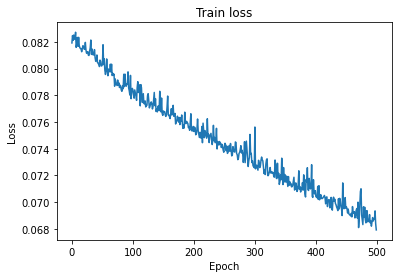

In [77]:
history = model.history
accuracy_deep = model.evaluate(X_test, y_test)[1]

plot_history(history)

🧪 **Test your code**

In [78]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_deeper_model.py::TestDeeperModel::test_accuracy PASSED        [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master


❓ Do you think we have overfitted on the noise ❓ Use the `plot_decision_regions` once again to build an intuition about it.

Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9771
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9771
Epoch 3/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9771
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9771
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9771
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9771
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9771
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9771
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9771
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9771
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9771
Epoch 84/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9771
Epoch 85/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9771
Epoch 86/500
6/6 [==============================] - 0s 859us/step - loss: 0.0668 - accuracy: 0.9771
Epoch 87/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9771
Epoch 88/500
6/6 [==============================] - 0s 726us/step - loss: 0.0679 - accuracy: 0.9771
Epoch 89/500
6/6 [==============================] - 0s 828us/step - loss: 0.0665 - accuracy: 0.9771
Epoch 90/500
6/6 [==============================] - 0s 850us/step - loss: 0.0675 - accuracy: 0.9771
Epoch 91/500
6/6 [==============================] - 0s 881us/step - loss: 0.0671 - accuracy: 0.9771
Epoch 92/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9771
Epoch 93/500
6/6 [=====

6/6 [==============================] - 0s 916us/step - loss: 0.0661 - accuracy: 0.9771
Epoch 165/500
6/6 [==============================] - 0s 827us/step - loss: 0.0668 - accuracy: 0.9771
Epoch 166/500
6/6 [==============================] - 0s 791us/step - loss: 0.0654 - accuracy: 0.9771
Epoch 167/500
6/6 [==============================] - 0s 952us/step - loss: 0.0658 - accuracy: 0.9771
Epoch 168/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9771
Epoch 169/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9771
Epoch 170/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9771
Epoch 171/500
6/6 [==============================] - 0s 880us/step - loss: 0.0667 - accuracy: 0.9771
Epoch 172/500
6/6 [==============================] - 0s 835us/step - loss: 0.0669 - accuracy: 0.9771
Epoch 173/500
6/6 [==============================] - 0s 841us/step - loss: 0.0655 - accuracy: 0.9771
Epoch 174/

6/6 [==============================] - 0s 925us/step - loss: 0.0667 - accuracy: 0.9771
Epoch 246/500
6/6 [==============================] - 0s 764us/step - loss: 0.0659 - accuracy: 0.9771
Epoch 247/500
6/6 [==============================] - 0s 739us/step - loss: 0.0653 - accuracy: 0.9771
Epoch 248/500
6/6 [==============================] - 0s 968us/step - loss: 0.0646 - accuracy: 0.9771
Epoch 249/500
6/6 [==============================] - 0s 871us/step - loss: 0.0647 - accuracy: 0.9771
Epoch 250/500
6/6 [==============================] - 0s 875us/step - loss: 0.0647 - accuracy: 0.9771
Epoch 251/500
6/6 [==============================] - 0s 774us/step - loss: 0.0654 - accuracy: 0.9771
Epoch 252/500
6/6 [==============================] - 0s 865us/step - loss: 0.0646 - accuracy: 0.9771
Epoch 253/500
6/6 [==============================] - 0s 735us/step - loss: 0.0662 - accuracy: 0.9771
Epoch 254/500
6/6 [==============================] - 0s 841us/step - loss: 0.0650 - accuracy: 0.9771
Epoc

6/6 [==============================] - 0s 828us/step - loss: 0.0650 - accuracy: 0.9771
Epoch 327/500
6/6 [==============================] - 0s 813us/step - loss: 0.0649 - accuracy: 0.9771
Epoch 328/500
6/6 [==============================] - 0s 768us/step - loss: 0.0644 - accuracy: 0.9771
Epoch 329/500
6/6 [==============================] - 0s 791us/step - loss: 0.0639 - accuracy: 0.9771
Epoch 330/500
6/6 [==============================] - 0s 941us/step - loss: 0.0640 - accuracy: 0.9771
Epoch 331/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9771
Epoch 332/500
6/6 [==============================] - 0s 833us/step - loss: 0.0640 - accuracy: 0.9771
Epoch 333/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9771
Epoch 334/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9771
Epoch 335/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9771
Epoch 336/50

6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9771
Epoch 408/500
6/6 [==============================] - 0s 810us/step - loss: 0.0637 - accuracy: 0.9771
Epoch 409/500
6/6 [==============================] - 0s 895us/step - loss: 0.0633 - accuracy: 0.9771
Epoch 410/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9771
Epoch 411/500
6/6 [==============================] - 0s 908us/step - loss: 0.0632 - accuracy: 0.9771
Epoch 412/500
6/6 [==============================] - 0s 903us/step - loss: 0.0635 - accuracy: 0.9771
Epoch 413/500
6/6 [==============================] - 0s 876us/step - loss: 0.0638 - accuracy: 0.9771
Epoch 414/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9771
Epoch 415/500
6/6 [==============================] - 0s 798us/step - loss: 0.0641 - accuracy: 0.9771
Epoch 416/500
6/6 [==============================] - 0s 949us/step - loss: 0.0639 - accuracy: 0.9771
Epoch 417/

6/6 [==============================] - 0s 969us/step - loss: 0.0630 - accuracy: 0.9771
Epoch 489/500
6/6 [==============================] - 0s 771us/step - loss: 0.0628 - accuracy: 0.9771
Epoch 490/500
6/6 [==============================] - 0s 895us/step - loss: 0.0627 - accuracy: 0.9771
Epoch 491/500
6/6 [==============================] - 0s 893us/step - loss: 0.0630 - accuracy: 0.9771
Epoch 492/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9771
Epoch 493/500
6/6 [==============================] - 0s 981us/step - loss: 0.0627 - accuracy: 0.9771
Epoch 494/500
6/6 [==============================] - 0s 769us/step - loss: 0.0630 - accuracy: 0.9771
Epoch 495/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9771
Epoch 496/500
6/6 [==============================] - 0s 719us/step - loss: 0.0641 - accuracy: 0.9771
Epoch 497/500
6/6 [==============================] - 0s 796us/step - loss: 0.0627 - accuracy: 0.9771
Epoch 49

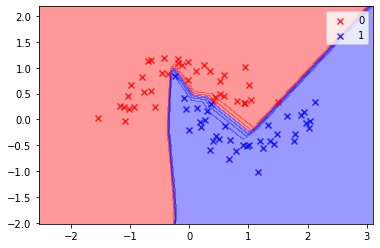

In [79]:
model.fit(X_train, y_train, batch_size=32, epochs=500)
y_pred = list(map(lambda x: 0 if x<0.5 else 1, model.predict(X_test)))
plots.plot_decision_regions(X_test, y_pred, model)

---

🏁 Congratulations !

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge !